In [1]:
 '''
Author information:
Joey R. Muffoletto
University of Texas at Austin
Autonomous Systems Group
jrmuff@utexas.edu
'''

'\nAuthor information:\nJoey R. Muffoletto\nUniversity of Texas at Austin\nAutonomous Systems Group\njrmuff@utexas.edu\n'

In [2]:
import os

import realtime_manager as rm 
import graph_manager as gm
import reworked_graph as rg
import copy

# os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz 2.44.1/bin'

In [3]:
'''
manager configurations

traffic test globals
'''
NUM_TOWERS = 4
TAU_MAX = 1
TAU = 0

LOW_TRAFFIC_MULTIPLIER = 1
HIGH_TRAFFIC_MULTIPLIER = 2

MIN_LOW_TRAFFIC = 0
MAX_LOW_TRAFFIC = LOW_TRAFFIC_MULTIPLIER * NUM_TOWERS

MIN_HIGH_TRAFFIC = MAX_LOW_TRAFFIC
MAX_HIGH_TRAFFIC = HIGH_TRAFFIC_MULTIPLIER * NUM_TOWERS

MIN_TTL = 0
MAX_TTL = 3

DEFAULT_EMPTY_STATE = rg.State((),(),{"0" : 6})
rm.configure_realtime(tau=TAU, override_default_empty_state=DEFAULT_EMPTY_STATE)

HIGH_TRAFFIC_FREQUENCY = .20 # use rand.random() = [0.0, 1.0], or, just add this value until = 1 then reset

NUM_TIME_STEPS = 40



In [4]:
'''
Input generation functions

low traffic is some random number between min_low_traffic and max_low_traffic, high traffic is the same with high

choose a random tower index everytime we add one

high traffic occurs everytime HIGH_TRAFFIC_FREQUENCY * TIME_STEPS is a whole number

TTL is a random number between MIN_TTL and MAX_TTL
'''
import random
random.seed(10)
def generate_traffic(min_traffic, max_traffic):
    additional_requests_dict = dict()
#     counter = 0
    requests_to_add = random.randint(min_traffic, max_traffic)
    for i in range(requests_to_add):
#         if counter == NUM_TOWERS:
#             counter = 0
#         tower_to_add_to = counter
#         counter+=1
        tower_to_add_to = random.randint(0, NUM_TOWERS-1) # NUM_TOWERS is OOB
        request_to_add = ('no_pref', random.randint(MIN_TTL, MAX_TTL))
#         request_to_add = ('no_pref', 5)
        if tower_to_add_to in additional_requests_dict:
            additional_requests_dict[tower_to_add_to].append(request_to_add)
        else:
            additional_requests_dict[tower_to_add_to] = [request_to_add]
    return additional_requests_dict
            
def generate_low_traffic():
    return generate_traffic(MIN_LOW_TRAFFIC, MAX_LOW_TRAFFIC)
    
def generate_high_traffic():
    return generate_traffic(MIN_HIGH_TRAFFIC, MAX_HIGH_TRAFFIC)

In [5]:
'''
Input Generation
'''
input = []
high_traffic_counter = 0
for time in range(NUM_TIME_STEPS):
    if high_traffic_counter == 1:
        high_traffic_counter = 0
        input.append([generate_high_traffic()])
    else:
        high_traffic_counter += HIGH_TRAFFIC_FREQUENCY
        input.append([generate_low_traffic()])
        
initial_system = [copy.deepcopy(gm.return_tower(0, 1, [],[6])) for i in range(NUM_TOWERS)]

In [6]:
'''
Input statistics:
'''
requests_per_tower = [0 for i in range(NUM_TOWERS)]
for time_step in range(len(input)):
    for i in range(NUM_TOWERS):
        if i in input[time_step][0]:
            requests_per_tower[i]+=len(input[time_step][0][i])
for i in range(NUM_TOWERS):
    print("tower " + str(i) + "has " + str(requests_per_tower[i]) + " requests")

tower 0has 25 requests
tower 1has 31 requests
tower 2has 25 requests
tower 3has 38 requests


In [7]:
'''
INPUT SAVING (DO NOT RE-RUN WILLY NILLY MY FRIEND)
'''
input_copy = copy.deepcopy(input)
# for _dict in input_copy:
#     print(_dict)

initial_system_copy = copy.deepcopy(initial_system)

In [8]:
'''
data collection
'''
_completed_states_per_tau = [[] for i in range(TAU_MAX)]
_timing_info_per_tau = [[] for i in range(TAU_MAX)]
for _tau in range(TAU_MAX):
    rm.configure_realtime(tau=_tau, override_default_empty_state=DEFAULT_EMPTY_STATE)
    traces, timings = rm.main_loop(initial_system_copy, copy.deepcopy(input_copy))
    _completed_states_per_tau[_tau] = copy.deepcopy(traces)
    _timing_info_per_tau[_tau] = copy.deepcopy(timings)
    gm.reset_globals()
#     print(traces)
    # _completed_states, _timing_info = rm.main_loop(initial_system_copy, input_copy)


additional requests for tower 0 = [('no_pref', 3)]
[('no_pref', 3)]
additional requests for tower 1 = [('no_pref', 3)]
[('no_pref', 3)]
additional requests for tower 3 = [('no_pref', 0), ('no_pref', 2)]
[('no_pref', 0), ('no_pref', 2)]
[('no_pref', 0), ('no_pref', 2)]
Tower has requests :: ['no_pref'] and times of [3] and ports of {'0': 6}
Tower has requests :: ['no_pref'] and times of [3] and ports of {'0': 6}
Tower has requests :: () and times of () and ports of {'0': 6}
Tower has requests :: ['no_pref', 'no_pref'] and times of [0, 2] and ports of {'0': 6}
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Most expensive request cost: [0, 0]
Most expensive request cost: [0, 0]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [0, 0]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of ac

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2]]

 new round - completed in time 0.06489487500039104
	round 0 breakdown :: 
	 tower 0 took 0.0025028160016518086 to find most expensive request and took 0.011848197000290384 to synthesize with published request
	 tower 1 took 0.0027097430011053802 to find most expensive request and took 0.01043113899868331 to synthesize with published request
	 tower 2 took 0.0050630910009203944 to find most expensive request and took 0.01195119800104294 to synthesize with published request
	 tower 3 took 0.004820932999791694 to find most expensive request and took 0.011069199001212837 to synthesize with published request

violation minimized
round breakdown average
tower 0 expensive request cumulative : 0.0025028160016518086 ,published request synthesis cumulative : 0.011848197000290384
tower 1 expensive request cumulative : 0.0027097430011053802 ,published request synthesis cumulative : 0.0

Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Most expensive request cost: [0, 0]
Most expensive request cost: [0, 0]
Most expensive request cost: [0, 0]
Most expensive request cost: [0, 0]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[1, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [1, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2]]

 new round - completed in time 0.08968112799993833
	round 0 breakdown :: 
	 tower 0 took 0.007876911000494147 to find most expensive request and took 0.015231572000629967 to synthesize with published request
	 tower 1 took 0.012843235999753233 to find most expensive request and took 0.026222690001304727 to

Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Most expensive request cost: [0, 1]
Most expensive request cost: [0, 0]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [-1, -1, -1]
accepting tower index -1
lowest_new_cost [0, 1]
cost of accepting request list :: [[2, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[2, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[2, 2], [0, 2], [0, 2]]

 new round - completed in time 0.050527843999589095
	round 0 breakdown :: 
	 tower 0 took 0.0035575629990489688 to find most expensive request and took 0.002734920000875718 to synthesize with published request
	 tower 1 took 0.007090478000463918 to find most expensive request and took 0.014353509997818037 to syn

Tower has requests :: ['no_pref'] and times of [2] and ports of {'0': 6}
Tower has requests :: ('no_pref',) and times of (1,) and ports of {'0': -5}
Tower has requests :: () and times of () and ports of {'0': 6}
Tower has requests :: ['no_pref', 'no_pref', 'no_pref', 'no_pref'] and times of [2, 3, 3, 1] and ports of {'0': 3}
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Most expensive request cost: [0, 0]
Most expensive request cost: [0, 0]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [0, 0]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request li

Tower's current cost = [2, 0]
Most expensive request cost: [0, 1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [2, 0]
accepting tower index 1
lowest_new_cost [0, 2]
cost of accepting request list :: [[3, 2], [0, 2], [0, 2]]

 new round - completed in time 0.04378184400047758
	round 0 breakdown :: 
	 tower 0 took 0.014900628000759752 to find most expensive request and took 0.008785160998741048 to synthesize with published request
	 tower 1 took 0.0017882810006994987 to find most expensive request and took 0.002306917000169051 to synthesize with published request
	 tower 2 took 0.0016569790004723473 to find most expensive request and took 0.002540126999519998 to synthesize with published request
	 tower 3 took 0.01121003899970674 to find most expensive request and took 0 to synthesize with published request <--- publishing tower

Tower has requests :: ['wrong_tower', 'no_pref', 'no_pref'] and times of [1, 0, 2] and ports

Tower's current cost = [0, 0]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [0, 0]
Most expensive request cost: [0, 0]
Most expensive request cost: [0, 0]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [2, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [1, 2], [2, 2]]

 new round - completed in time 0.060807538000517525
	round 0 breakdown :: 
	 tower 0 took 0.0018994900001416681 to find most expensive request and took 0.007297000000107801 to synthesize with published request
	 tower 1 took 0.003869287998895743 to find most expensive request and took 0.00998848299968813 to synthesize with published request
	 tower 2 took 0.005038371999035007 to fin

accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [1, 2], [0, 2]]

 new round - completed in time 0.08843914800127095
	round 1 breakdown :: 
	 tower 0 took 3.74589999410091e-05 to find most expensive request and took 0.008899352000298677 to synthesize with published request
	 tower 1 took 0.019307502998344717 to find most expensive request and took 0.04138542899818276 to synthesize with published request
	 tower 2 took 2.6380002964287996e-06 to find most expensive request and took 0.008251096000094549 to synthesize with published request
	 tower 3 took 1.981999957934022e-06 to find most expensive request and took 0.00902761499855842 to synthesize with published request

violation minimized
round breakdown average
tower 0 expensive request cumulative : 0.0020892560005449923 ,published request synthesis cumulative : 0.010878080001930357
tower 1 expensive request cumulative : 0.06474689299830061 ,published request synthesis cumulative : 0.041385428

Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [0, 0]
Most expensive request cost: [0, 0]
Most expensive request cost: [0, 0]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2]]

 new round - completed in time 0.04915113299830409
	round 0 breakdown :: 
	 tower 0 took 0.0017754409982444486 to find most expensive request and took 0.006810881999626872 to synthesize with published request
	 tower 1 took 0.0037378649994934676 to find most expensive request and took 0.008358437000424601 to synthesize with published request
	 tower 2 took 0.002486908000719268 to find most expensive request and 

accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [1, 2]]

 new round - completed in time 0.04285864799931005
	round 0 breakdown :: 
	 tower 0 took 0.0034942549991683336 to find most expensive request and took 0.005638001000988879 to synthesize with published request
	 tower 1 took 3.682998794829473e-06 to find most expensive request and took 0.008577149001212092 to synthesize with published request
	 tower 2 took 0.0018957659995066933 to find most expensive request and took 0.008192746003260254 to synthesize with published request
	 tower 3 took 0.0037985189992468804 to find most expensive request and took 0.009380352999869501 to synthesize with published request

violation minimized
round breakdown average
tower 0 expen

accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2]]

 new round - completed in time 0.05912057599925902
	round 2 breakdown :: 
	 tower 0 took 3.0819992389297113e-06 to find most expensive request and took 0.01429686200026481 to synthesize with published request
	 tower 1 took 1.7500005924375728e-06 to find most expensive request and took 0.012066007997418637 to synthesize with published request
	 tower 2 took 0.004033650000565103 to find most expensive request and took 0.015648285998395295 to synthesize with published request
	 tower 3 took 0.00011513199933688156 to find most expensive request and took 0.012258501001269906 to synthesize with published request

violation minimized
round breakdown average
tower 0 expensive request cumulative : 0.00896374199874117 ,published request synthesis cumulative : 0.024115822001476772
tower 1 expensive request cumulative : 0.004489647002628772 ,published request synthesis cumulative : 0.019655

accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [1, 2]]

 new round - completed in time 0.05252714199923503
	round 0 breakdown :: 
	 tower 0 took 0.003941401000702172 to find most expensive request and took 0.002593069000795367 to synthesize with published request
	 tower 1 took 6.506999852717854e-06 to find most expensive request and took 0.01245214600021427 to synthesize with published request
	 tower 2 took 2.6340003387304023e-06 to find most expensive request and took 0.013344750999749522 to synthesize with published request
	 tower 3 took 0.004678878000049735 to find most expensive request and took 0.014

In [9]:
'''
data buffer (DO NOT RE-RUN WILLY-NILLY)
'''
completed_states = copy.deepcopy(_completed_states_per_tau)
timing_info = copy.deepcopy(_timing_info_per_tau)




In [10]:
'''
process data buffer
'''
percent_valid = [0 for i in range(len(completed_states[0]))]
percent_valid_per_tau = [copy.copy(percent_valid) for i in range(TAU_MAX)]
for tau,completed in enumerate(completed_states):
    print(completed)
    print("\n\n\n\n\n\n")
    for index, com in enumerate(completed):
        for state in com:
            if("VALID" in state.labels):
                percent_valid_per_tau[tau][index] += 1

for tower_cost in percent_valid_per_tau:
    print(tower_cost)
    
# actual_percentages = [(i/len(completed_states[0])) for i in percent_valid]
# print(actual_percentages)

# mvp_output_per_tower
mvp_output_per_tower_per_tau = [rm.get_mvp_output(completed) for completed in completed_states]
for tau in mvp_output_per_tower_per_tau:
    for output in tau:
        gm.print_formatted_cost(output[0],format_override=True)
#     output[3].plot()
#     gm.print_formatted_trace_path(output[1])
for timings in timing_info:
    print(timings)
    

[[State currently has requests :: ('no_pref',) Time states of :: (3,) Port states of :: {'0': 6} Labels :: ('VALID',)  
, State currently has requests :: ('no_pref',) Time states of :: (3,) Port states of :: {'0': 5} Labels :: ('VALID',)  
, State currently has requests :: ('no_pref',) Time states of :: (1,) Port states of :: {'0': 4} Labels :: ('VALID',)  
, State currently has requests :: () Time states of :: () Port states of :: {'0': 3} Labels :: ('VALID', 'FINISH')  
, State currently has requests :: () Time states of :: () Port states of :: {'0': 6} Labels :: ('VALID', 'FINISH')  
, State currently has requests :: ('no_pref', 'wrong_tower') Time states of :: (2, 0) Port states of :: {'0': 6} Labels :: ('VALID',)  
, State currently has requests :: ('no_pref', 'no_pref') Time states of :: (1, 3) Port states of :: {'0': 5} Labels :: ('VALID',)  
, State currently has requests :: ('no_pref', 'no_pref') Time states of :: (2, 0) Port states of :: {'0': 4} Labels :: ('VALID',)  
, Stat

Path cost [0, 0, 41]
Path cost [0, 0, 41]
Path cost [0, 0, 41]
Path cost [0, 0, 41]
[0.07821006999984093, 0.06709380100073759, 0.06621171299957496, 0.07465195099939592, 0.054960729999947944, 0.137063981999745, 0.10314842899970245, 0.0907087199993839, 0.09434177699949942, 0.10826880399872607, 0.06060476899983769, 0.1085165650001727, 0.11548010399928899, 0.18114671900002577, 0.15904512099950807, 0.2071372810005414, 0.15655745799995202, 0.16585403600038262, 0.07435382599942386, 0.08462977399904048, 0.07518244200036861, 0.09887159800018708, 0.11086443599924678, 0.168519140999706, 0.10207410600014555, 0.056253097998705925, 0.07266958899890597, 0.05816890999994939, 0.0822411879998981, 0.3174943859994528, 0.07386026499989384, 0.051449509999656584, 0.0696754670007067, 0.07599315900006332, 0.16025789699961024, 0.13488503000007768, 0.06995867500154418, 0.12623384699872986, 0.08336215400049696, 0.06330315800005337, 0.0, 0.0]


In [11]:
'''
data buffer for mvp output
'''
percent_valid = [0 for i in range(len(completed_states[0]))]
percent_valid_per_tau = [copy.copy(percent_valid) for i in range(TAU_MAX)]

number_requests_per_TAU = [0 for i in range(len(completed_states[0]))]

for tau,completed in enumerate(completed_states):
    for index, com in enumerate(completed):
        for state in com:
            if("VALID" in state.labels):
                percent_valid_per_tau[tau][index] += 1
                
    

for tower_cost in percent_valid_per_tau:
    print(tower_cost)
mvp_output_per_tower_per_tau_copy = copy.deepcopy(mvp_output_per_tower_per_tau)
# for tau in mvp_output_per_tower_per_tau_copy:
#     for output in tau:
#         gm.print_formatted_cost(output[0],format_override=True)
# for timings in timing_info:
#     print(timings)

[42, 42, 42, 42]


In [12]:
'''
calculating heuristic cost
'''
heurstic_cost_per_tau = [copy.copy(percent_valid) for i in range(TAU_MAX)]
for tau,completed in enumerate(completed_states):
    for index, com in enumerate(completed):
        for state in com:
            for req in state.request_vector:
                if(req == "wrong_tower"):
                    heurstic_cost_per_tau[tau][index] += 1
for heuristic_cost in heurstic_cost_per_tau:
    print(heuristic_cost)

[9, 2, 0, 1]


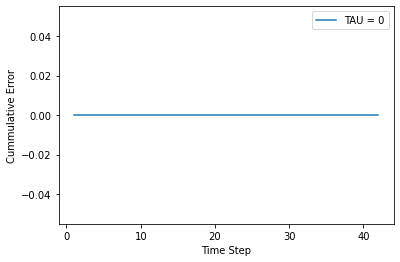

In [13]:
'''
More data processing
'''
# sum up the negative costs for the tower (get total expiration value)
cost_per_tau_over_time = [[] for i in range(TAU_MAX)]
for index,tau in enumerate(completed_states):
    sum_cost = 0
    for time_step in range(len(completed_states[0][0])):
        for tower in tau:
            for expiration in tower[time_step].time_vector:
                if expiration < 0:
                    sum_cost -= expiration 
        cost_per_tau_over_time[index].append(sum_cost)
cost_per_tau_over_time = cost_per_tau_over_time[:5]
'''
first plot:
cummulative expiration cost vs. time step
label with periods of high traffic and low traffic
do a line per tau
'''
import matplotlib.pyplot as plt
x = [i+1 for i in range(len(completed_states[0][0]))]
for tau_num, tau in enumerate(cost_per_tau_over_time):
    plt.plot(x, tau, label = "TAU = " + str(tau_num))
plt.legend()
plt.xlabel('Time Step')
plt.ylabel('Cummulative Error')
plt.show()